In [153]:
import scipy.io
mat = scipy.io.loadmat('MSdata.mat')

In [154]:
print(type(mat))

<class 'dict'>


In [155]:
print(mat)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sun Nov 12 22:59:49 2017', '__version__': '1.0', '__globals__': [], 'testx': array([[  45.442  ,  -30.74976,   31.78587,    4.63569, ...,  -33.52722,   -3.86253,   36.424  ,    7.17309],
       [  52.67814,   -2.88914,   43.95268,   -1.39209, ...,   -7.27179,   -4.00966,  -68.96211,   -5.21525],
       [  45.74235,   12.02291,   11.03009,  -11.60763, ...,  -61.12698,  -10.92522,   26.75348,   -5.78743],
       [  52.55883,    2.87222,   27.38848,   -5.76235, ...,  -45.3586 ,   -4.55694,  -43.17368,   -3.33725],
       ...,
       [  49.8787 ,   37.93125,   18.65987,   -3.63581, ...,  -10.63242,   12.96552,   92.11633,   10.88815],
       [  45.12852,   12.65758,  -38.72018,    8.80882, ..., -248.6102 ,   -6.07171,   53.96319,   -8.09364],
       [  44.16614,   32.38368,   -3.34971,   -2.49165, ...,   71.47198,   20.3224 ,   14.83107,   39.74909],
       [  51.85726,   59.11655,   26.39436,   -5.4603 , ...,  -45.61012,

In [156]:
print(mat['trainx'])

[[ 4.994357e+01  2.147114e+01  7.307750e+01  8.748610e+00 ...  6.840795e+01 -1.822230e+00 -2.746348e+01  2.263270e+00]
 [ 4.873215e+01  1.842930e+01  7.032679e+01  1.294636e+01 ...  7.049388e+01  1.204941e+01  5.843453e+01  2.692061e+01]
 [ 5.095714e+01  3.185602e+01  5.581851e+01  1.341693e+01 ... -1.150070e+02 -5.859000e-02  3.967068e+01 -6.634500e-01]
 [ 4.824750e+01 -1.898370e+00  3.629772e+01  2.587760e+00 ... -7.208993e+01  9.905580e+00  1.996297e+02  1.885382e+01]
 ...
 [ 4.262982e+01  1.163038e+01 -2.400713e+01 -1.348721e+01 ... -2.331975e+02  2.850070e+00  1.068887e+02 -6.253090e+00]
 [ 4.437612e+01  1.625310e+00  3.816556e+01  2.263370e+00 ... -7.257607e+01 -4.399480e+00  2.242941e+01 -4.108930e+00]
 [ 4.488723e+01  1.414760e+01 -5.706940e+00 -1.970480e+01 ...  3.354519e+01  1.157071e+01  1.066151e+02  1.680881e+01]
 [ 5.032201e+01  6.711910e+00  5.405607e+01 -7.560200e+00 ... -9.003160e+00  3.777360e+00 -4.294888e+01  5.278000e-02]]


In [157]:
from sklearn.decomposition import PCA

In [158]:
pca =PCA(n_components = 50)

In [159]:
pca.fit(mat['trainx'])

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [160]:
mat['trainx'] = pca.transform(mat['trainx'])

In [161]:
mat['testx'] = pca.transform(mat['testx'])

In [162]:
print(mat['trainy'])

[[2001]
 [2001]
 [2001]
 [2001]
 ...
 [2006]
 [2007]
 [2006]
 [2007]]


In [163]:
print(type(mat['trainx']))

<class 'numpy.ndarray'>


In [164]:
import pandas as pd
import numpy as np
songs_df_train = pd.DataFrame(np.hstack((mat['trainx'], mat['trainy'])))

In [165]:
songs_df_train.head()

0            1           2           3           4           5   \
0 -2410.112516    26.200442  124.811178 -100.559911  100.889237  -78.165638   
1 -1434.707880  1127.899556 -234.853484    9.551597  301.474346  172.169954   
2 -2338.014545    19.317922   33.851400  -53.068504  -12.165354 -386.341465   
3 -1399.476313  1241.170591 -275.672576  121.863550 -427.094394   57.145161   
4 -2404.425390   540.525858  175.749643  -12.729187   23.119166 -234.869732   

           6           7           8           9    ...           41  \
0 -251.429662   38.117271 -150.944697 -147.278732   ...    27.032633   
1  175.630674 -183.118465  221.484341  -25.693398   ...    32.735645   
2 -135.073855  106.209023 -129.748235  -90.979274   ...    49.327323   
3 -463.254924    1.248988  174.014279   71.018957   ...   -66.421551   
4 -238.981315  120.351149    8.652672  -54.331437   ...    -4.711764   

          42         43         44         45         46         47  \
0  10.420118  17.277823  44.246693  49.285822 -31.975414 -67.608518   
1  69.451484   7.099143  -8.531329   9.284200 -36.637977 -49.514785   
2  12.502300  -6.313250  56.960909  14.185928  29.255449  14.277385   
3  42.405257 -10.587352 -24.798783 -23.747286  58.516398 -32.966414   
4  25.995038   3.068883  -3.162978  95.388445  34.803243 -11.677605   

          48         49      50  
0   0.579080  10.481710  2001.0  
1  28.435327 -41.186167  2001.0  
2 -16.620183  -0.293300  2001.0  
3  -3.730378  -7.513140  2001.0  
4 -33.716361 -49.857277  2001.0  

[5 rows x 51 columns]

In [59]:
from fastai.tabular import *

In [61]:
cat_names = []
cont_names = list(range(0,90))

In [62]:
print(cont_names)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]


In [63]:
dep_var = 90

In [64]:
songs_df_test = pd.DataFrame((mat['testx']))

In [65]:
print(mat['testx'])

[[  45.442    -30.74976   31.78587    4.63569 ...  -33.52722   -3.86253   36.424      7.17309]
 [  52.67814   -2.88914   43.95268   -1.39209 ...   -7.27179   -4.00966  -68.96211   -5.21525]
 [  45.74235   12.02291   11.03009  -11.60763 ...  -61.12698  -10.92522   26.75348   -5.78743]
 [  52.55883    2.87222   27.38848   -5.76235 ...  -45.3586    -4.55694  -43.17368   -3.33725]
 ...
 [  49.8787    37.93125   18.65987   -3.63581 ...  -10.63242   12.96552   92.11633   10.88815]
 [  45.12852   12.65758  -38.72018    8.80882 ... -248.6102    -6.07171   53.96319   -8.09364]
 [  44.16614   32.38368   -3.34971   -2.49165 ...   71.47198   20.3224    14.83107   39.74909]
 [  51.85726   59.11655   26.39436   -5.4603  ...  -45.61012   -5.51512   32.35602   12.17352]]


In [66]:
print(songs_df_test.head())

         0         1         2         3         4         5         6   \
0  45.44200 -30.74976  31.78587   4.63569 -15.14894   0.23370 -11.97968   
1  52.67814  -2.88914  43.95268  -1.39209 -14.93379 -15.86877   1.19379   
2  45.74235  12.02291  11.03009 -11.60763  11.80054 -11.12389  -5.39058   
3  52.55883   2.87222  27.38848  -5.76235 -15.35766 -15.01592  -5.86893   
4  51.34809   9.02702  25.33757  -6.62537   0.03367 -12.69565  -3.13400   

        7        8        9    ...          80        81         82        83  \
0 -9.59708  6.48111 -8.89073   ...    -8.84046  -0.15439  137.44210  77.54739   
1  0.31401 -4.44235 -5.78934   ...    -5.74356 -42.57910   -2.91103  48.72805   
2 -1.11981 -7.74086 -3.33421   ...    -4.70606 -24.22599  -35.22686  27.77729   
3 -0.31447 -5.06922 -4.62734   ...    -8.35215 -16.86791  -10.58277  40.10173   
4  2.98649 -6.71750 -1.85804   ...    -6.87366 -20.03371  -66.38940  50.56569   

         84        85        86        87        88       89  

In [67]:
print(songs_df_test)

             0         1         2         3         4         5         6   \
0      45.44200 -30.74976  31.78587   4.63569 -15.14894   0.23370 -11.97968   
1      52.67814  -2.88914  43.95268  -1.39209 -14.93379 -15.86877   1.19379   
2      45.74235  12.02291  11.03009 -11.60763  11.80054 -11.12389  -5.39058   
3      52.55883   2.87222  27.38848  -5.76235 -15.35766 -15.01592  -5.86893   
4      51.34809   9.02702  25.33757  -6.62537   0.03367 -12.69565  -3.13400   
5      45.84640   2.83376  -6.00506 -15.16150 -10.72385 -15.15233   5.00724   
6      48.13579   1.08643   9.58996 -12.59594  -0.09405 -12.14748 -13.70928   
7      50.77422  10.30697  38.83383   2.13523 -12.29503 -16.12694   3.01091   
8      49.15897  -2.38256  51.10676   2.09651 -19.88360 -10.84717   1.93666   
9      50.63053 -10.59162  33.56985  -3.65707 -17.25244 -15.49789  -1.12368   
10     51.75762  -2.38966  23.38103  -6.43940  -6.82025 -16.42617  -7.92891   
11     51.03049   8.83463  19.62971  -6.24698 -13.17

In [68]:
print(type(songs_df_test))

<class 'pandas.core.frame.DataFrame'>


In [69]:
procs = [FillMissing, Categorify, Normalize]

test = TabularList.from_df(songs_df_test, cat_names=cat_names, cont_names=cont_names, procs=procs)

In [133]:
data = (TabularList.from_df(songs_df_train, path='.', cat_names=cat_names, cont_names=cont_names, procs=procs)
                        .split_by_rand_pct(valid_pct = 0.9, seed = 42)
#                         .split_none()
                        .label_from_df(cols = dep_var, label_cls = FloatList)
                        .add_test(test)
                        .databunch(bs=512))

In [134]:
learn = tabular_learner(data, layers=[200,100], metrics=mae)

In [135]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


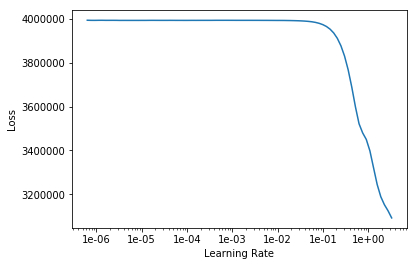

In [136]:
learn.recorder.plot()

In [137]:
learn.fit_one_cycle(2, max_lr =0.3e-01)

In [138]:
learn.save('Model1')

In [139]:
learn.load('Model1')

Learner(data=TabularDataBunch;

Train: LabelList (46372 items)
x: TabularList
0 1.1806; 1 -0.0172; 2 2.3581; 3 1.2895; 4 -0.8306; 5 -0.7428; 6 1.5842; 7 -0.4288; 8 -0.0078; 9 -1.0082; 10 0.6006; 11 -0.6685; 12 -1.1690; 13 -0.8279; 14 -0.9432; 15 -0.8407; 16 -0.8861; 17 -1.0143; 18 -0.5330; 19 -0.7307; 20 -0.4212; 21 -0.6616; 22 -0.8631; 23 -0.9549; 24 -0.3049; 25 -0.2531; 26 0.1023; 27 0.0650; 28 -0.4211; 29 -0.5147; 30 -0.1644; 31 -0.1709; 32 0.2985; 33 -0.4083; 34 -0.1248; 35 -0.4844; 36 -0.1901; 37 -0.6139; 38 0.5674; 39 0.1400; 40 -0.1327; 41 -1.0826; 42 -0.4322; 43 -0.5111; 44 0.5917; 45 -0.2875; 46 -0.2441; 47 -0.2631; 48 0.2979; 49 -0.0798; 50 0.4105; 51 -0.4698; 52 0.0757; 53 0.4964; 54 0.0948; 55 -0.3577; 56 -0.3861; 57 -0.1256; 58 -0.2170; 59 -0.1355; 60 0.2793; 61 0.5150; 62 0.0173; 63 -0.4865; 64 -0.2304; 65 -0.1088; 66 -0.1257; 67 0.3465; 68 0.0162; 69 -0.2854; 70 0.4100; 71 0.6871; 72 0.2006; 73 0.4341; 74 0.1237; 75 -0.0250; 76 -0.0521; 77 0.4231; 78 0.0741; 79 0.1678; 8

In [77]:
learn.fit_one_cycle(3, max_lr =0.5e-01)

In [78]:
learn.fit_one_cycle(2, max_lr =0.5e-01)

In [79]:
learn.save('Model2')

In [80]:
learn.load('Model2')

Learner(data=TabularDataBunch;

Train: LabelList (370972 items)
x: TabularList
0 1.0776; 1 0.3919; 2 1.8252; 3 0.4684; 4 -0.4776; 5 -0.2744; 6 -1.5499; 7 -1.3144; 8 0.3886; 9 -0.6656; 10 0.7941; 11 -0.5841; 12 -1.0556; 13 -1.0426; 14 -0.8027; 15 -0.7428; 16 -1.0567; 17 -0.8551; 18 -0.8745; 19 -0.9013; 20 -0.6648; 21 -0.8339; 22 -1.0056; 23 -0.7346; 24 -0.4223; 25 -0.5048; 26 0.2591; 27 0.3476; 28 -0.6763; 29 -0.4645; 30 -0.0359; 31 0.1463; 32 0.0238; 33 0.1028; 34 0.1688; 35 -0.6763; 36 -0.1984; 37 -0.4423; 38 0.5836; 39 0.2414; 40 -0.3013; 41 -0.1802; 42 0.3788; 43 -0.4274; 44 0.4206; 45 -0.4563; 46 0.0083; 47 0.3714; 48 0.3608; 49 0.0509; 50 -0.3363; 51 -0.4319; 52 0.0098; 53 0.4764; 54 0.0503; 55 -0.3114; 56 0.0024; 57 0.2399; 58 -0.0768; 59 -0.1165; 60 -0.1927; 61 0.1543; 62 -0.2726; 63 0.1385; 64 -0.3679; 65 -0.2829; 66 0.0139; 67 0.3695; 68 -0.0365; 69 0.1860; 70 -0.1130; 71 -0.2033; 72 0.1173; 73 0.3040; 74 0.2004; 75 -0.0136; 76 0.0418; 77 -0.1179; 78 0.2519; 79 0.1072; 80 -0.0

In [140]:
preds, targets = learn.get_preds(DatasetType.Test)

In [141]:
print(preds, targets)

tensor([[1463.3921],
        [1463.3921],
        [1463.3921],
        ...,
        [1463.3921],
        [1463.3921],
        [1463.3921]]) tensor([0, 0, 0,  ..., 0, 0, 0])


In [122]:
print(list(preds))

[tensor([1987.9496]), tensor([1987.9431]), tensor([1987.9601]), tensor([1987.9446]), tensor([1987.9469]), tensor([1987.9642]), tensor([1987.9567]), tensor([1987.9393]), tensor([1987.9503]), tensor([1987.9464]), tensor([1987.9445]), tensor([1987.9452]), tensor([1987.9404]), tensor([1987.9489]), tensor([1987.9398]), tensor([1987.9569]), tensor([1987.9648]), tensor([1987.9456]), tensor([1987.9449]), tensor([1987.9498]), tensor([1987.9474]), tensor([1987.9371]), tensor([1987.9401]), tensor([1987.9458]), tensor([1987.9474]), tensor([1987.9581]), tensor([1987.9403]), tensor([1987.9454]), tensor([1987.9257]), tensor([1987.9160]), tensor([1987.9196]), tensor([1987.9117]), tensor([1987.9301]), tensor([1987.9337]), tensor([1987.9225]), tensor([1987.9364]), tensor([1987.9159]), tensor([1987.9315]), tensor([1987.9176]), tensor([1987.9330]), tensor([1987.9440]), tensor([1987.9169]), tensor([1987.9296]), tensor([1987.9532]), tensor([1987.9280]), tensor([1987.9144]), tensor([1987.9316]), tensor([1987

In [103]:
labels = [p[0].data.item() for p in preds]

In [115]:
preds[0][0].data.item()

2001.19384765625

In [99]:
test_id = list(range(1,51631))

In [104]:
submission = pd.DataFrame({'dataid': test_id, 'prediction': labels})

In [105]:
submission.to_csv('submission4.csv', index=False)